SCARA PATH GENERATOR

[[0.         0.         0.        ]
 [1.         1.         1.        ]
 [1.10288066 1.10288066 1.10288066]
 [1.37860082 1.37860082 1.37860082]
 [1.77777778 1.77777778 1.77777778]
 [2.25102881 2.25102881 2.25102881]
 [2.74897119 2.74897119 2.74897119]
 [3.22222222 3.22222222 3.22222222]
 [3.62139918 3.62139918 3.62139918]
 [3.89711934 3.89711934 3.89711934]
 [4.         4.         4.        ]]
[[ 0.          0.          0.        ]
 [-0.1637459   0.67474094  2.        ]
 [ 0.6424904   0.5843739   1.        ]
 [ 0.65118744  0.54728236  0.89711934]
 [ 0.724083    0.24619688  0.62139918]
 [ 0.57015369  0.91073066  0.22222222]
 [ 0.46594505  1.54841756 -0.25102881]
 [ 0.65043794  0.55046597 -0.74897119]
 [ 0.61752229  0.6929364  -1.22222222]
 [ 0.60501913  0.74868776 -1.62139918]
 [ 0.601908    0.76272858 -1.89711934]
 [ 0.60116773  0.76608005 -2.        ]]


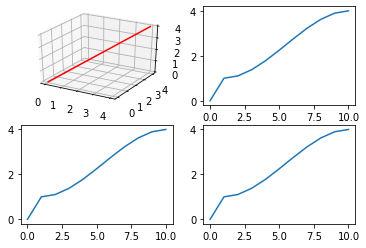

In [3]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
ini=np.array([1,1,1])
f=np.array([3,3,3])
tf=9
ax0=ini[0]
ay0=ini[1]
az0=ini[2]
ax1=0
ay1=0
az1=0

A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
K=np.array([f[0],f[1],f[2],0,0,0])
invA=np.linalg.inv(A)
X=invA@K
ax2=X[0]
ax3=X[1]
ay2=X[2]
ay3=X[3]
az2=X[4]
az3=X[5]
Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
arr = np.array([[0,0,0]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2,t**3])
     
    row=Aa@T
    arr = np.vstack([arr,row])
  return arr

arr = np.array([[0,0,0]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory
print(arr1)

#inverse kinematics

def invkine(arr1,J):
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    offset=2;
    d1=3;
    d2=1;
    r = abs((x[0]**2+x[1]**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan2(np.sqrt(abs(1-r**2)),r)
    theta1 = np.arctan2(x[1],x[0]) - np.arctan2((d2*np.sin(theta2)),(d1+d2*np.cos(theta2)))
    d3 =offset-x[2]
    s=np.array([theta1,theta2,d3])
    J=np.vstack([J,s])
  return J

    
J=np.array([[0,0,0]])
arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
print(arr2)
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
ax.plot3D(X[0],X[1],X[2],'r')

t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])


plt.show()



**The 3D is the xyz PLOT and others are X,y,z vs t plot respectively**

In [ ]:
  Q1=arr2[:,0]
  Q2=arr2[:,1]
  D4=arr2[:,2]
  D4

array([ 0.        ,  2.        ,  1.        ,  0.83381924,  0.40524781,
       -0.18075802, -0.81924198, -1.40524781, -1.83381924, -2.        ])

**AFTER CALCULATING JACOBIAN WE CALCULATE THE KINETIC + ROTATIONAL ENERGY AND HENCE THE DQ AND CQ matrix and GQ matrix**

In [52]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
G=9.8
m4=1


l1=25
l2=25
m1=3
m2=3
m4=3


sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F= sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F ')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([q1dot,q2dot,d4dot])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])
GQ=sym.Matrix([0,0,m4*G])
tau=sym.Matrix([T1,T2,F])
i1=m1*l1*l1/3
i2=m2*l2*l2/3
i3=m4*l2*l2/3
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
Z=O.T
M1=sym.Matrix([[0,0,0],[0,0,0],[1,0,0]]);
X1=M1.T
N1=sym.Matrix([[0,0,0],[0,0,0],[1,1,0]]);
Y1=N1.T
O1=sym.Matrix([[0,0,0],[0,0,0],[1,1,0]]);
Z1=O1.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,i3]])
DQ0=(sym.simplify(m1*X*M)+sym.simplify(m2*Y*N)+sym.simplify(m4*Z*O))
DQ1=(sym.simplify(i1*X1*M1)+sym.simplify(i2*Y1*N1)+sym.simplify(i3*Z1*O1))
DQ=DQ0+DQ1
no1=3
n=0;
m=0;
P=no1**2
row3, col3 = (P, no1)
CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=(0.5*(sym.diff(DQ[k,j],k1[i]) + sym.diff(DQ[k,i],k1[j])-sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        
difF=sym.simplify(DQ.inv()*(CQQD*(k2)+GQ-tau))



	


In [7]:
from sympy.printing.pycode import pycode
pycode(difF[0])
(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)
(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)

'(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)'

In [6]:
difF

⎡  ⎛              2        ⎞ ⎛              2                                 
⎢- ⎝T₂ - 2812.5⋅q1̇ ⋅sin(q₂)⎠⋅⎝15820312.5⋅cos (q₂) + 43945312.5⋅cos(q₂) + 3032
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                            44494628906.25⋅co
⎢                                                                             
⎢                                       ⎛              2        ⎞             
⎢                                       ⎝T₂ - 2812.5⋅q1̇ ⋅sin(q₂)⎠⋅(5625.0⋅cos
⎢                                       ──────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

dynamics solver USING PI CONTROLLER

In [10]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2


sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot q3dot q1ddot q2ddot q3ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])


Z0=sym.Matrix([[0],[0],[1]]);
Z1=sym.Matrix([[0],[0],[1]]);
Z2=sym.Matrix([[0],[0],[-1]]);
O3=sym.Matrix([[l1*sym.cos(q1)+l2*sym.cos(q1+q2)],[l1*sym.sin(q1)+l2*sym.sin(q1+q2)],[-l3]])
O2=sym.Matrix([[l1*sym.cos(q1)+l2*sym.cos(q1+q2)],[l1*sym.sin(q1)+l2*sym.sin(q1+q2)],[0]])
O1=sym.Matrix([[l1*sym.cos(q1)],[l1*sym.sin(q1)],[0]])
O0=sym.Matrix([[0],[0],[0]])

sym.simplify(Z0.cross(O3-O0)),sym.simplify(Z1.cross(O3-O1)),sym.simplify(Z2)

⎛⎡-l₁⋅sin(q₁) - l₂⋅sin(q₁ + q₂)⎤  ⎡-l₂⋅sin(q₁ + q₂)⎤  ⎡0 ⎤⎞
⎜⎢                             ⎥  ⎢                ⎥  ⎢  ⎥⎟
⎜⎢l₁⋅cos(q₁) + l₂⋅cos(q₁ + q₂) ⎥, ⎢l₂⋅cos(q₁ + q₂) ⎥, ⎢0 ⎥⎟
⎜⎢                             ⎥  ⎢                ⎥  ⎢  ⎥⎟
⎝⎣              0              ⎦  ⎣       0        ⎦  ⎣-1⎦⎠

In [50]:
#JACOBIAN TO calculate jooint Angular velocity and accelaration
J=sym.Matrix([[-l1*sym.sin(q1) - l2*sym.sin(q1 + q2), -l2*sym.sin(q1 + q2), 0],
       [l1*sym.cos(q1) + l2*sym.cos(q1 + q2), l2*sym.cos(q1 + q2), 0],
       [0, 0, -1]])
#to calculate jont angular velocity Qdot
#Endeffector velocity
v=np.array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.24781341e-01,  0.00000000e+00],
       [ 0.00000000e+00,  8.74635569e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.04956268e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.04956268e+00,  0.00000000e+00],
       [ 0.00000000e+00,  8.74635569e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.24781341e-01,  0.00000000e+00],
       [ 0.00000000e+00, -1.38777878e-16,  0.00000000e+00]])
a=np.array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.6122449 ,  0.        ],
       [ 0.        ,  0.43731778,  0.        ],
       [ 0.        ,  0.26239067,  0.        ],
       [ 0.        ,  0.08746356,  0.        ],
       [ 0.        , -0.08746356,  0.        ],
       [ 0.        , -0.26239067,  0.        ],
       [ 0.        , -0.43731778,  0.        ],
       [ 0.        , -0.6122449 ,  0.        ]])
Q1=np.array([ 0., -0.1637459 ,  0.6424904 ,  0.65874639,  0.63623502,
        0.47257178,  0.73894073,  0.60972479,  0.60245313,  0.60116773])
Q2=np.array([0., 0.67474094, 0.5843739 , 0.51530277, 0.61126651,
       1.48927457, 0.18623433, 0.72758217, 0.76026321, 0.76608005])
D4=np.array([ 0.,2.,1.,  0.83381924,  0.40524781,
       -0.18075802, -0.81924198, -1.40524781, -1.83381924, -2.        ])

arrqd=np.array([[0,0,0]])
for i in range(9):
  Qdt=J.inv()
  Qdt1= Qdt.subs({l1:25,l2:25,q1:Q1[i],q2:Q2[i],l3:D4[i]})
  arrqd=np.vstack([arrqd,np.transpose(Qdt1@np.transpose(v[i]))])
Q1dotd=arrqd[:,0]
Q2dotd=arrqd[:,1]
D4dotd=arrqd[:,2]
#Joint accelaration calculator
Jdot=sym.Matrix([[-l1*sym.cos(q1)*q1dot- l2*sym.cos(q1 + q2)*(q1dot+q2dot), -l2*sym.cos(q1 + q2)*(q1dot+q2dot), 0],
       [-l1*sym.sin(q1)*q1dot - l2*sym.sin(q1 + q2)*(q1dot+q2dot), -l2*sym.sin(q1 + q2)*(q1dot+q2dot), 0],
       [0, 0, 1]])
arrqd1=np.array([[0,0,0]])
for i in range(9):
  Qddt=Jdot.inv()
  Qddt1= Qdt.subs({l1:25,l2:25,q1:Q1[i],q2:Q2[i],l3:D4[i],q1dot:Q1dotd[i],q2dot:Q1dotd[i]})
  arrqd1=np.vstack([arrqd1,np.transpose(Qddt1@np.transpose(a[i]))])
Q1ddotd=arrqd[:,0]
Q2ddotd=arrqd[:,1]
D4ddotd=arrqd[:,2]



In [48]:
Jdot=sym.Matrix([[-l1*sym.cos(q1)*q1dot- l2*sym.cos(q1 + q2)*(q1dot+q2dot), -l2*sym.cos(q1 + q2)*(q1dot+q2dot), 0],
       [-l1*sym.sin(q1)*q1dot - l2*sym.sin(q1 + q2)*(q1dot+q2dot), -l2*sym.sin(q1 + q2)*(q1dot+q2dot), 0],
       [0, 0, 1]])
arrqd1=np.array([[0,0,0]])
for i in range(9):
  Qddt=Jdot.inv()
  Qddt1= Qdt.subs({l1:25,l2:25,q1:Q1[i],q2:Q2[i],l3:D4[i],q1dot:Q1dotd[i],q2dot:Q1dotd[i]})
  arrqd1=np.vstack([arrqd1,np.transpose(Qddt1@np.transpose(a[i]))])

In [49]:
arrqd1

array([[0, 0, 0],
       [nan, nan, 0],
       [0.0191719506491235, -0.0127813006430221, 0],
       [0.0298512739486800, -0.0488505649817587, 0],
       [0.0196436467849633, -0.0326807169654311, 0],
       [0.00578021762844683, -0.00940230367855874, 0],
       [-0.00324521267836335, 0.00484297744089744, 0],
       [-0.0452751485411279, 0.0834522558179742, 0],
       [-0.0255885076633576, 0.0406502594223016, 0],
       [-0.0347716020416159, 0.0549098619992124, 0]], dtype=object)

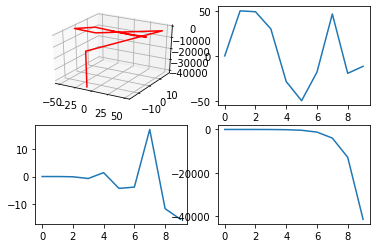

In [4]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
E1=[]
E2=[]
E3=[]
T=[]
m4=3
Q1=np.array([ 0., -0.1637459 ,  0.6424904 ,  0.65874639,  0.63623502,
        0.47257178,  0.73894073,  0.60972479,  0.60245313,  0.60116773])
Q2=np.array([0., 0.67474094, 0.5843739 , 0.51530277, 0.61126651,
       1.48927457, 0.18623433, 0.72758217, 0.76026321, 0.76608005])
D4=np.array([ 0.,2.,1.,  0.83381924,  0.40524781,
       -0.18075802, -0.81924198, -1.40524781, -1.83381924, -2.        ])


def Model(t, y):

  KP1=0.8
  KI1=0.1003
  KP2=0.6
  KI2=5
  KP3=1.3
  KI3=8
  q1=y[0]
  q2=y[1]
  d4=y[2]
  q1dot=y[3]
  q2dot=y[4]
  d4dot=y[5]
  dq1dt=q1dot
  dq2dt=q2dot
  dzdt=d4dot
    
  T.append(t)
   
  n=round(t)
  if(t<=n+1):
    e1=(Q1[n-1]-q1)
    e2=(Q2[n-1]-q2)
    e3=(D4[n-1]-d4)
  else:
    n=n+1
    e1=(Q1[n]-q1)
    e2=(Q2[n]-q2)
    e3=(D4[n]-d4)
   
  E1.append(e1)
  E2.append(e2)
  E3.append(e3)
  s1=0
  s2=0
  s3=0

  if(t>2):
      for i in range(7):
          s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])

  V1=KP1*(e1)+KI1*(s1)
    #print(T1)
  V2=KP2*(e2)+KI2*(s2)
  F=KP3*(e3)+KI3*(s3)
  Jmk=1000
  Bmk=100
  KbkKmkBYRk=100
  KmkBYRk=10
  T1=-((Bmk + KbkKmkBYRk)*q1dot-(KmkBYRk)*(1/V1))
  T2=-((Bmk + KbkKmkBYRk)*q2dot-(KmkBYRk)*(1/V2))


    
    #dq1ddt=(360*q1dot*q2dot*np.sin(q2)+360*q2dot*(q1dot+q2dot)*np.sin(q2)-(-6*q1dot**2*np.sin(q2)+3)*(72*np.cos(q2)+60)+240)/(432*np.cos(q2)**2-540)
  dq1ddt=(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094+Jmk)
    #dq2ddt=((-6*q1dot**2*np.sin(q2)+3)*(12*np.cos(q2)+14)-(6*np.cos(q2)+5)*(6*q1dot*q2dot*np.sin(q2)+6*q2dot*(q1dot+q2dot)*np.sin(q2)+4))/(36*np.cos(q2)**2-45)
  dq2ddt=((T2 - 2812.5*q1dot**2*math.sin(q2))*(5625.0*math.cos(q2) + 8437.5) - (2812.5*math.cos(q2) + 3593.75)*(T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2)))/(7910156.25*math.cos(q2)**2 - 17407226.5625+Jmk)
  dzddt= -F/m4 + 9.8

    
  dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dydt



initstate = np.array([Q1[0],Q2[0],D4[0],0,0,0]) # initial states
timestep = 1

time=np.linspace(0,9,9) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model,[0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]

sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);

Q1x=sym.simplify(A1*A2*A3)
Q2x=sym.simplify(A1*A2)
Q3x=sym.simplify(A1)
#FORWARD KINEMATICS
def pathfunc12(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q1x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr



arr313 = np.array([[0,0,0,0]])
arr3131 =np.delete(pathfunc12(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc13(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q2x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3132 =np.delete(pathfunc13(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc14(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q3x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3134 =np.delete(pathfunc14(Q1n,Q2n,D4n,arr313),3,1)
#END EFFECTOR PLOT
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr3131 ],[s[1] for s in arr3131 ],[s[2] for s in arr3131 ]]
ax.plot3D(X[0],X[1],X[2],'r')

t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])




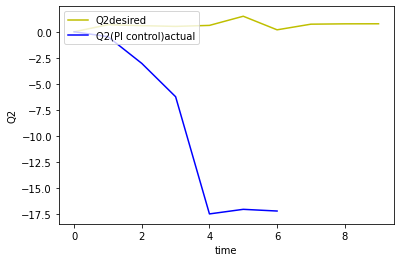

In [ ]:
plt.plot(Q2,'y')
plt.plot(Q2n,'b')
plt.xlabel('time')
plt.ylabel('Q2')
plt.legend(["Q2desired", "Q2(PI control)actual"], loc ="upper left")

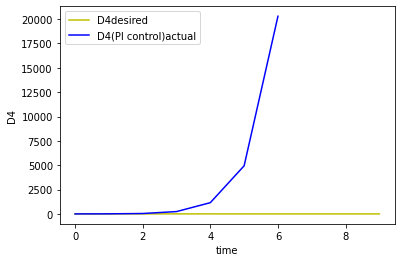

In [ ]:
plt.plot(D4,'y')
plt.plot(D4n,'b')
plt.xlabel('time')
plt.ylabel('D4')
plt.legend(["D4desired", "D4(PI control)actual"], loc ="upper left")

In [17]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1



sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);



Q=sym.simplify(A1*A2*A3)
#FORWARD KINEMATICS
for i in range(len(Q1n)):
  FA=Q.subs((l1,25),(l2,25),(q1,Q1n),(q2,Q2n),(l3,D4n))



⎡cos(q₁ + q₂)  sin(q₁ + q₂)   0   l₁⋅cos(q₁) + l₂⋅cos(q₁ + q₂)⎤
⎢                                                             ⎥
⎢sin(q₁ + q₂)  -cos(q₁ + q₂)  0   l₁⋅sin(q₁) + l₂⋅sin(q₁ + q₂)⎥
⎢                                                             ⎥
⎢     0              0        -1              -l₃             ⎥
⎢                                                             ⎥
⎣     0              0        0                1              ⎦

In [18]:
sym.simplify(A1*A2)

⎡cos(q₁ + q₂)  sin(q₁ + q₂)   0   l₁⋅cos(q₁) + l₂⋅cos(q₁ + q₂)⎤
⎢                                                             ⎥
⎢sin(q₁ + q₂)  -cos(q₁ + q₂)  0   l₁⋅sin(q₁) + l₂⋅sin(q₁ + q₂)⎥
⎢                                                             ⎥
⎢     0              0        -1               0              ⎥
⎢                                                             ⎥
⎣     0              0        0                1              ⎦

In [11]:
A1

⎡cos(q₁)  -sin(q₁)  0  l₁⋅cos(q₁)⎤
⎢                                ⎥
⎢sin(q₁)  cos(q₁)   0  l₁⋅sin(q₁)⎥
⎢                                ⎥
⎢   0        0      1      0     ⎥
⎢                                ⎥
⎣   0        0      0      1     ⎦

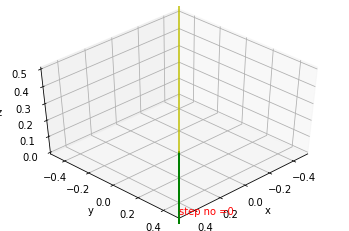

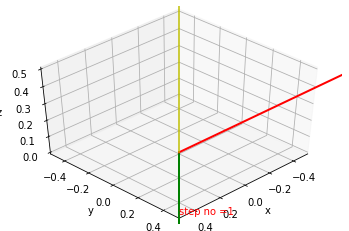

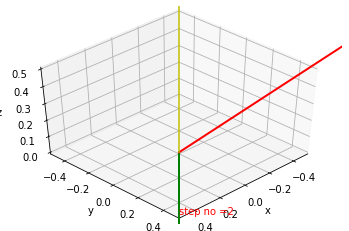

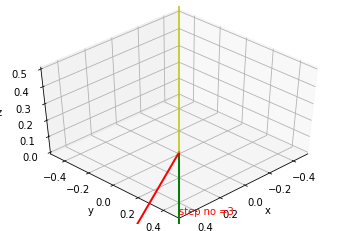

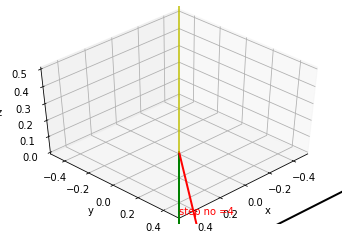

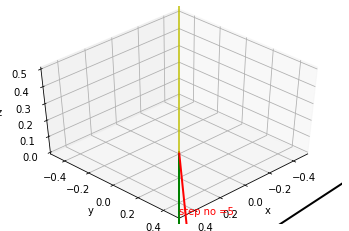

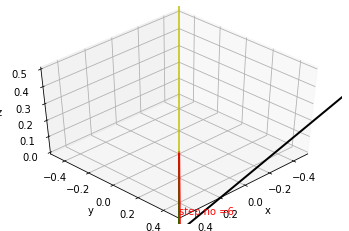

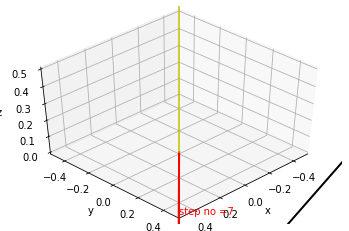

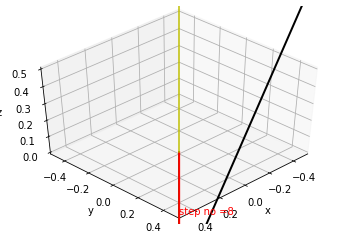

In [6]:
def plotrobotscara(ox,oy,oz):
   # plot in 3D 3 DOF robot from DH param. base link added

  link0x = [0,0]
  link0y = [0,0]
  link0z = [0,25]
  link1x = [ox[0],ox[1]]
  link1y = [oy[0],oy[1]]
  link1z = [oz[0],oz[1]]
  link2x = [ox[1],ox[2]]
  link2y = [oy[1],oy[2]]
  link2z = [oz[1],oz[2]]
  link3x = [ox[2],ox[3]]
  link3y = [oy[2],oy[3]]
  link3z = [oz[2],oz[3]]
  ax = plt.axes(projection='3d')
  ax.set_zlabel('z')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  elev = 45
  azim = 45
  ax.view_init(elev, azim)
  ax.set_xlim(-0.5, 0.5)
  ax.set_ylim(-0.5, 0.5)
  ax.set_zlim(0, 0.5)
 #print('verification of endpoint by FK', ox[3], oy[3], oz[3])
  v = ax.plot3D(link0x, link0y, link0z, '-g',label='base', linewidth=2) #base link
  a = ax.plot3D(link1x, link1y, link1z, '-r',label='link1', linewidth=2)
  b = ax.plot3D(link2x, link2y, link2z, '-b',label='link2', linewidth=2)
  c = ax.plot3D(link3x, link3y, link3z, '-k',label='link3', linewidth=2)
  return ax
# Animate in 3D
for i in range(9):
  x1=arr3131[i][0]
  x2=arr3132[i][0]
  x3=arr3134[i][0]
  y1=arr3131[i][1]
  y2=arr3132[i][1]
  y3=arr3134[i][0]
  z1=arr3131[i][2]
  z2=arr3132[i][2]
  z3=arr3134[i][0]
  ox=[0,x1,x2,x3]
  oy=[0,y1,y2,y3]
  oz=[0,z1,z2,z3]
  ax = plotrobotscara(ox,oy,oz)
  X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
  ax.plot3D(X[0],X[1],X[2],'-y')
  plt.draw()
  ax.text(0.5, 0.5, 0, 'step no ='+str(i), color='red')
  plt.pause(0.001)

**SYMBOLIC JACOBIAN CALCULATOR**

**DDOT-2C calculator and verification**

In [ ]:
from sympy.physics.vector import dynamicsymbols
from sympy import diff, Symbol
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2
i1=1
i2=1
#I1=0.5mL2
#I2=0.5mL2


sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F,mG,t = sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG t')
q1, q2, d4= dynamicsymbols('q1,q2,d4')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([diff(q1,t),diff(q2,t),diff(d4,t)])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
Z=O.T
M1=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X1=M1.T
N1=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y1=N1.T
O1=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
Z1=O1.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,0]])
DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=(sym.simplify(X1*M1)+sym.simplify(Y1*N1)+sym.simplify(Z1*O1))*I
DQ=DQ0+DQ1
no1=3
n=0;
m=0;
P=no1**2
row3, col3 = (P, no1)
CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=((-sym.diff(DQ[k,i],k1[j])+sym.diff(DQ[i,j],k1[k])))*k2[i]
            
            
        CQQD[k,j]=su
        
        
difF=sym.simplify(DQ.inv()*(CQQD*(k2)+GQ-tau))

CQQD

	


⎡                                                                         d   
⎢                           0                             24.0⋅sin(q₂(t))⋅──(q
⎢                                                                         dt  
⎢                                                                             
⎢                  d                           d                              
⎢- 24.0⋅sin(q₂(t))⋅──(q₁(t)) - 12.0⋅sin(q₂(t))⋅──(q₂(t))                      
⎢                  dt                          dt                             
⎢                                                                             
⎣                           0                                                 

                        d           ⎤
₁(t)) + 12.0⋅sin(q₂(t))⋅──(q₂(t))  0⎥
                        dt          ⎥
                                    ⎥
                                    ⎥
      0                            0⎥
                                    ⎥
                      

**CQQD is the DDOT-2C matrix which is skew symmetric**

In [ ]:
sym.simplify(CQQD)

⎡                                               ⎛     d                d      
⎢                      0                        ⎜24.0⋅──(q₁(t)) + 12.0⋅──(q₂(t
⎢                                               ⎝     dt               dt     
⎢                                                                             
⎢ ⎛     d                d        ⎞                                           
⎢-⎜24.0⋅──(q₁(t)) + 12.0⋅──(q₂(t))⎟⋅sin(q₂(t))                       0        
⎢ ⎝     dt               dt       ⎠                                           
⎢                                                                             
⎣                      0                                             0        

  ⎞              ⎤
))⎟⋅sin(q₂(t))  0⎥
  ⎠              ⎥
                 ⎥
                 ⎥
                0⎥
                 ⎥
                 ⎥
                0⎦